# Problem 5 Playing with Data Summaries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [28]:
head=["birth weight", "pregnancy lenght", "first born", "mother's age", "mother's height", "mother's prepregnancy weight", "smoking status"]
data = pd.DataFrame(np.loadtxt("birth.txt"), columns=head )
data.head()

,birth weight,pregnancy lenght,first born,mother's age,mother's height,mother's prepregnancy weight,smoking status
0,120.0,284.0,0.0,27.0,62.0,100.0,0.0
1,113.0,282.0,0.0,33.0,64.0,135.0,0.0
2,128.0,279.0,0.0,28.0,64.0,115.0,1.0
3,123.0,999.0,0.0,36.0,69.0,190.0,0.0
4,108.0,282.0,0.0,23.0,67.0,125.0,1.0


### (a)

We only keep the observations with known mother's height, which leaves n = 1214 entires. After trial and error, we find nbins = 20 is optimal for the shape of the histogram.

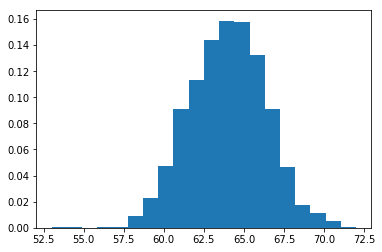

In [71]:
heights = data[data["mother's height"] != 99]["mother's height"]

nbins = int(1 + np.log2(len(heights)))
plt.hist(heights, bins=20, normed=1)
plt.show()

### (b)

The center of the sample is not well-defined because we have even number of data points.

The mean, median, standard deviation and IQR are given by:

In [90]:
mean = heights.mean()
median = heights.median()
std = heights.std()
IQR = np.percentile(heights, 75) - np.percentile(heights, 25)
print("mean:", mean)
print("median:", median)
print("standard deviation:", std)
print("IQR:", IQR)

mean: 64.0477759472817
median: 64.0
standard deviation: 2.5334089196921297
IQR: 4.0


In [138]:
heights.var()

6.418160754375643

In [139]:
np.sqrt(heights.var())

2.5334089196921297

### (c)
From the following plots, the sample (mohter's heights) is approximately normal (with a slightly fatter lower tail). With mean and variance estimated by the sample mean and sample variance: $\mu = 64.05,\ \  \sigma^2=6.42$.

boxplot:

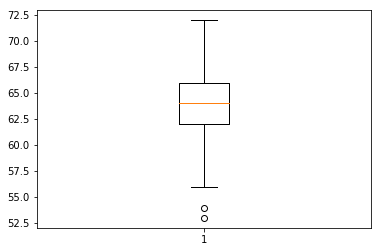

In [91]:
plt.boxplot(heights)
plt.show()

emperical cdf and normal cdf:

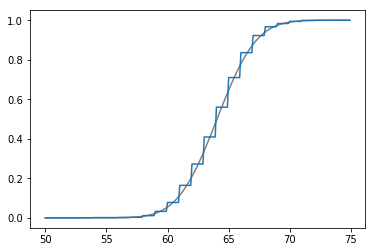

In [133]:
def eCDF(data, x):
    return sum(data < x) / len(data)

x = np.arange(50,75,0.1)
plt.plot(x, norm.cdf((x-mean)/std), c="grey")
plt.plot(x, [eCDF(heights, xi) for xi in x])
plt.show()

QQ plot:

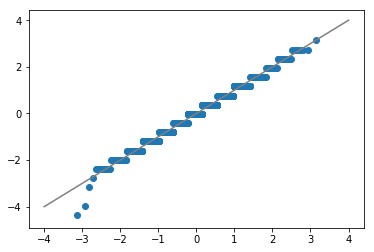

In [135]:
n = len(heights)
X = np.sort((heights-heights.mean())/heights.std())

index = np.array([i for i in range(1,n+1)])
Z = norm.ppf(index/(n+1))

plt.plot([-4,4],[-4,4],c="grey")
plt.scatter(Z, X)
plt.show()

### (d)

Based on the sample means and boxplots, there is no statistical significance in the difference of the heights between the two groups.

In [191]:
smokingHeights = data[(data["mother's height"] != 99) & (data["smoking status"] == 1)]["mother's height"]
nonsmokingHeights = data[(data["mother's height"] != 99) & (data["smoking status"] == 0)]["mother's height"]

print("smoking mother's heights mean: ", smokingHeights.mean())
print("nonsmoking mother's heights mean: ", nonsmokingHeights.mean())

smoking mother's heights mean:  64.09129511677283
nonsmoking mother's heights mean:  64.01637107776261


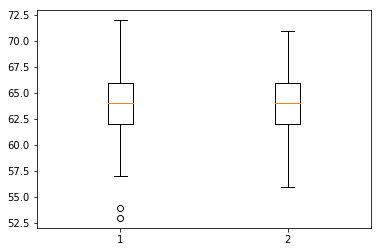

In [179]:
plt.boxplot([np.array(smokingHeights),nonsmokingHeights])
plt.show()